<a href="https://colab.research.google.com/github/Mr-Stark-18/Soc2k21_Checkpoint2/blob/main/PytorchBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])
print(x*y)

tensor([10.,  3.])


In [ ]:
x = torch.zeros([2,5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [ ]:
x.shape

torch.Size([2, 5])

In [ ]:
y = torch.rand([2,5])

In [ ]:
y

tensor([[0.1526, 0.2172, 0.0344, 0.7698, 0.5997],
        [0.4132, 0.4187, 0.8732, 0.9400, 0.0554]])

In [ ]:
y = y.view([1,10])

In [ ]:
y

tensor([[0.1526, 0.2172, 0.0344, 0.7698, 0.5997, 0.4132, 0.4187, 0.8732, 0.9400,
         0.0554]])

- 2

In [ ]:
pip install torchvision

In [ ]:
import torch 
import torchvision
from torchvision import transforms, datasets

In [ ]:
#in torchvision aur data is already in a form we can input
# we can havea trained dataset and test dataset
train = datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw




Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)
#mnist is a hand drawn numbers dataset


In [ ]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x, y=data[0][0],data[1][0]
print(y)

tensor(0)


In [ ]:
import matplotlib.pyplot as plt
print(data[0][0].shape)

torch.Size([1, 28, 28])


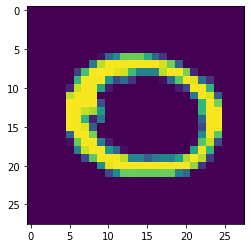

In [ ]:
#reason to use torchvision is that the shape of data is different from our basic image
plt.imshow(data[0][0].view(28,28))
plt.show()

In [ ]:
#if a model can find a shorter path to minimize loss it will take it
total =0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

In [ ]:
for data in trainset:
  xs, ys = data
  for y in ys:
    counter_dict[int(y)]+=1
    total+=1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
for i in counter_dict:
  print(f"{i}:{counter_dict[i]/total*100}")

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


- 3 Building our Neural Network


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x,dim=1)

    



net = Net()
print(net)



Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand((28,28))
X = X.view(-1,28*28)

In [ ]:
X

tensor([[4.5626e-01, 3.9957e-01, 2.8550e-01, 1.4852e-01, 6.3084e-01, 1.8044e-01,
         3.7197e-01, 9.0841e-01, 4.8536e-01, 5.9599e-01, 5.0829e-01, 7.4790e-01,
         6.6839e-01, 1.1800e-01, 7.6773e-01, 9.1358e-01, 5.4384e-01, 6.4620e-01,
         9.0265e-01, 3.1911e-01, 2.0386e-01, 1.3425e-01, 9.6284e-01, 8.3544e-02,
         8.8479e-01, 2.1293e-01, 7.0855e-01, 7.5820e-01, 5.5018e-01, 9.4088e-01,
         1.8804e-01, 9.2404e-01, 4.7406e-01, 7.8377e-01, 4.3023e-01, 6.3027e-01,
         3.7555e-01, 2.8965e-01, 3.5049e-01, 4.3313e-01, 2.3660e-01, 9.1414e-01,
         4.8942e-01, 1.2565e-02, 7.4119e-01, 2.4257e-01, 6.0627e-01, 9.4234e-01,
         3.5327e-01, 6.1815e-01, 6.0458e-01, 9.9572e-01, 2.3579e-01, 4.8150e-01,
         4.5882e-01, 3.7991e-01, 2.6906e-01, 7.5193e-01, 7.2348e-01, 3.7585e-01,
         8.3428e-01, 4.7464e-01, 5.4286e-01, 5.8320e-01, 2.3792e-01, 4.7209e-01,
         1.9593e-01, 9.5508e-01, 7.4543e-01, 7.5764e-02, 4.6720e-01, 3.1448e-01,
         4.5971e-01, 1.3935e

In [ ]:
output = net(X)

In [ ]:
output

tensor([[-2.4220, -2.3696, -2.2841, -2.4136, -2.1946, -2.2505, -2.1371, -2.3418,
         -2.3727, -2.2803]], grad_fn=<LogSoftmaxBackward>)